In [77]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn import metrics
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Extracting the dataset
df = pd.read_csv("D:/GUVI-Data Science/Mainboot_Camp/Projects/Proj3_Household_energy_usage/individual+household+electric+power+consumption/household_power_consumption.txt",sep=';', parse_dates={'Datetime': ['Date', 'Time']}, dayfirst=True)
df.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


#Doing EDA(Exploratory Data Analysis)

In [5]:
#Getting the number of rows and columns
df.shape

(2075259, 8)

In [7]:
#Getting info() of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Datetime               datetime64[ns]
 1   Global_active_power    object        
 2   Global_reactive_power  object        
 3   Voltage                object        
 4   Global_intensity       object        
 5   Sub_metering_1         object        
 6   Sub_metering_2         object        
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 126.7+ MB


In [9]:
#Since the datatypes of the columns are object instead of float converting them into float
for column in df.columns:
    if df[column].dtypes == 'object':
        df[column] = pd.to_numeric(df[column], errors='coerce') #Coerce will convert invalid numbers into NaN

print(df.dtypes)

Datetime                 datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object


In [11]:
#Checking for any null values 
df.isnull().sum().any()

True

#True Means there is null values 

In [13]:
#Getting total number of null values
df.isnull().sum()

Datetime                     0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [10]:
'''
Since there is around 1.25% of missing data, we are the dropping the missing rows of data as it is less than
5% in the total data and after removing the missing data we still have sufficient data to do EDA/Analysis/ML Modelling
'''

'\nSince there is around 1.25% of missing data, we are the dropping the missing rows of data as it is less than\n5% in the total data and after removing the missing data we still have sufficient data to do EDA/Analysis/ML Modelling\n'

In [15]:
#Dropping the null values 
#inplace = True means it affects the dataframe directly
df.dropna(inplace=True)

In [17]:
#Verifying the missing values
print(df.isnull().sum())
print(df.shape)

Datetime                 0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64
(2049280, 8)


In [13]:
'''
From the above it is clearly seen as there is no missing values and total rows are 20,49,280 .
'''

'\nFrom the above it is clearly seen as there is no missing values and total rows are 20,49,280 .\n'

In [19]:
#Finding any duplicates
df.duplicated().sum()

0

#0 Means no duplicates

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 140.7 MB


In [23]:
#Doing statistical analysis
df.describe()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2049280,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,2008-12-02 00:59:44.397740544,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
min,2006-12-16 17:24:00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007-12-10 05:37:45,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008-11-30 01:22:30,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2009-11-23 20:31:15,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,2010-11-26 21:02:00,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01
std,NaN,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00


In [25]:
#Matrix for correlation
df.corr()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,1.000000,-0.041838,0.053472,0.249370,-0.045805,-0.014364,-0.037956,0.054291
Global_active_power,-0.041838,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555
Global_reactive_power,0.053472,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617
Voltage,0.249370,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172
Global_intensity,-0.045805,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,-0.014364,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,-0.037956,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.054291,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


<Axes: >

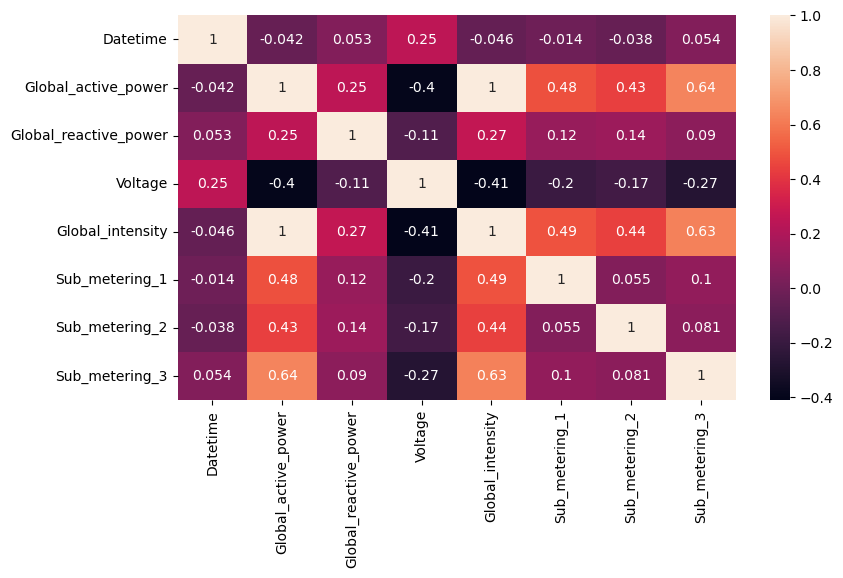

In [27]:
#Heatmap for the correlation matrix
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(),annot = True)

In [20]:
'''
Conclusion --> From the above Heatmap it is clear that
1) Global_active_power and sub_metering_3 are strongly correlated(0.64), where power increases sub_meter also increases
2) Global_active_power and voltage are negatively correlated(-0.4), where voltage decreases power consumption increases
'''

'\nConclusion --> From the above Heatmap it is clear that\n1) Global_active_power and sub_metering_3 are strongly correlated(0.64), where power increases sub_meter also increases\n2) Global_active_power and voltage are negatively correlated(-0.4), where voltage decreases power consumption increases\n'

In [29]:
#As per the approach in problem statement, Now parsing the datetime into separate features
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour
df.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,17
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,17
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,17
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,17
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,17


In [31]:
#Then Creating additional features such as daily averages, peak hours, or rolling averages.
#1) Daily Averages
df['Daily_averages'] = df.groupby('Day')['Global_active_power'].transform('mean')
df.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Daily_averages
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,17,1.11229
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,17,1.11229
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,17,1.11229
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,17,1.11229
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,17,1.11229


In [33]:
#2) Peak Hours
#Considering peak hours as Morning 6-9 AM and Evening 5-9 PM
df['Peak_hours'] = df['Hour'].apply(lambda x : 1 if (6 <= x <= 9 or 17 <= x <= 21) else 0)
df.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Daily_averages,Peak_hours
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,17,1.11229,1
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,17,1.11229,1
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,17,1.11229,1
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,17,1.11229,1
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,17,1.11229,1


In [35]:
#3) Rolling Averages - a metric that calculates trends over short periods of time using a set of data
df['Rolling_average'] = df['Global_active_power'].rolling(window=24).mean() #If we execute this line only Nan values are coming upto window = 23, so filling that Nan values using fillna
df['Rolling_average'].fillna(df['Global_active_power'].expanding().mean(), inplace=True) #expanding().mean() calculates the mean of all preceding values
df.head(30)

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Daily_averages,Peak_hours,Rolling_average
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,17,1.11229,1,4.216000
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,17,1.11229,1,4.788000
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,17,1.11229,1,4.983333
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,17,1.11229,1,5.084500
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,17,1.11229,1,4.800800
5,2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0,2006,12,16,17,1.11229,1,4.587333
6,2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0,2006,12,16,17,1.11229,1,4.460857
7,2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0,2006,12,16,17,1.11229,1,4.365750
8,2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0,2006,12,16,17,1.11229,1,4.288222
9,2006-12-16 17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0,2006,12,16,17,1.11229,1,4.225600


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
 8   Year                   int32         
 9   Month                  int32         
 10  Day                    int32         
 11  Hour                   int32         
 12  Daily_averages         float64       
 13  Peak_hours             int64         
 14  Rolling_average        float64       
dtypes: datetime64[ns](1), float64(9), int32(4), int64(1)
memory usage: 218.9 MB


<Axes: >

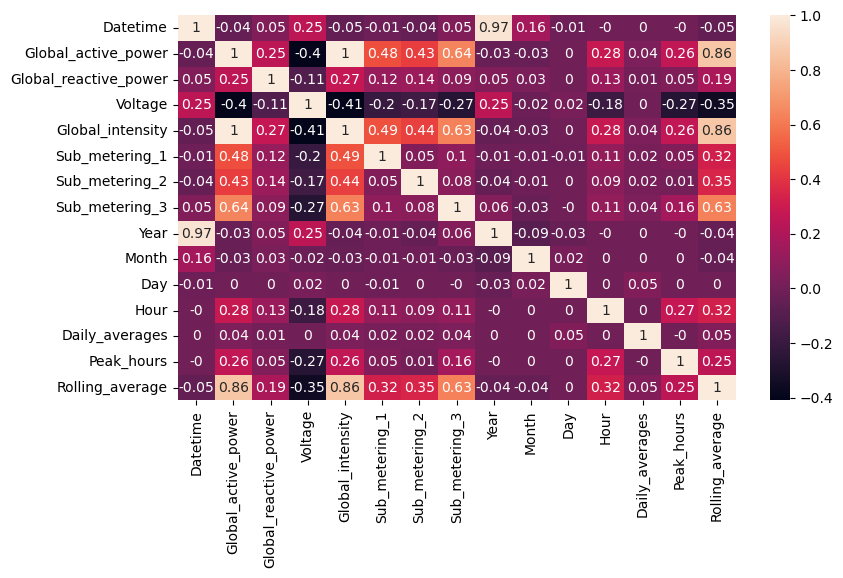

In [39]:
#Plotting heatmap with df.corr with all the features
plt.figure(figsize=(9,5))
sns.heatmap(df.corr().round(2),annot = True)

In [41]:
#Separating Input features and Target Variables
X = df[['Global_intensity','Voltage','Sub_metering_1','Sub_metering_2','Sub_metering_3','Rolling_average']]
y = df['Global_active_power']

#Performing train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 5)

In [43]:
#Applying Standard Scaler to scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
#Initializing the Model
lr = LinearRegression()

#Fitting the model
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [47]:
#Taking predictions from the model
y_pred = lr.predict(X_test_scaled)
y_train_pred = lr.predict(X_train_scaled)

In [49]:
#Model Evaluation on Training data
print('Training RMSE:',np.round(np.sqrt(metrics.mean_squared_error(y_train_pred,y_train)),2))
print('Training R2 Score:',np.round(metrics.r2_score(y_train_pred,y_train),2))

#Model Evaluation on Testing data
print('\nTesting RMSE:',np.round(np.sqrt(metrics.mean_squared_error(y_pred,y_test)),2))
print('Testing R2 Score:',np.round(metrics.r2_score(y_pred,y_test),2))

Training RMSE: 0.04
Training R2 Score: 1.0

Testing RMSE: 0.04
Testing R2 Score: 1.0


In [51]:
#Lasso method to perform automatic feature selection by shrinking the coefficients of less important features towards zero, effectively removing them from the model,


# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training Lasso Regression
lasso = Lasso(alpha=0.01)  # You can tune alpha for better performance
lasso.fit(X_train_scaled, y_train)

# Predictions
y_pred = lasso.predict(X_test_scaled)

# Model Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


R² Score: 0.9979
Mean Absolute Error (MAE): 0.0325
Mean Squared Error (MSE): 0.0023
Root Mean Squared Error (RMSE): 0.0479


In [53]:
#Decision Tress
#Making a copy of the dataframe

df1 = df.copy()
df1.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Daily_averages,Peak_hours,Rolling_average
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,17,1.11229,1,4.216000
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,17,1.11229,1,4.788000
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,17,1.11229,1,4.983333
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,17,1.11229,1,5.084500
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,17,1.11229,1,4.800800


In [55]:
#Since all the EDA has done previously now straight away into decision tress
#Separating input features and Target Variable
X = df1[['Global_intensity','Voltage','Sub_metering_1','Sub_metering_2','Sub_metering_3','Rolling_average']]
y = df1['Global_active_power']

#Performing train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=5)

In [57]:
#Creating DecisionTreeRegressor()
clf = DecisionTreeRegressor()

#Fitting the model
clf.fit(X_train,y_train)

DecisionTreeRegressor()

In [59]:
#Taking Predictions 
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

In [60]:
#Evaluation
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print(f"Mean Absolute Error : {mae:.4f}")
print(f"Mean Squared Error : {mse:.4f}")
print(f"Root Mean Squared Error : {rmse:.4f}")
print(f"R2 Score : {r2:.4f}")

Mean Absolute Error : 0.0270
Mean Squared Error : 0.0020
Root Mean Squared Error : 0.0452
R2 Score : 0.9982


In [63]:
#Model Evaluation on Training data
print('Training RMSE:',np.round(np.sqrt(metrics.mean_squared_error(y_train_pred,y_train)),2))
print('Training R2 Score:',np.round(metrics.r2_score(y_train_pred,y_train),2))

#Model Evaluation on Testing data
print('\nTesting RMSE:',np.round(np.sqrt(metrics.mean_squared_error(y_pred,y_test)),2))
print('Testing R2 Score:',np.round(metrics.r2_score(y_pred,y_test),2))

Training RMSE: 0.0
Training R2 Score: 1.0

Testing RMSE: 0.05
Testing R2 Score: 1.0


#Random Forest Regressor

In [65]:
#Making copy of data
df2 = df.copy()
df2.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Daily_averages,Peak_hours,Rolling_average
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,17,1.11229,1,4.216000
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,17,1.11229,1,4.788000
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,17,1.11229,1,4.983333
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,17,1.11229,1,5.084500
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,17,1.11229,1,4.800800


In [67]:
#Separating input features and Target Variable
X = df2[['Global_intensity','Voltage','Sub_metering_1','Sub_metering_2','Sub_metering_3','Rolling_average']]
y = df2['Global_active_power']

#Performing train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=5)

In [69]:
#Creating the model
model = RandomForestRegressor(
     n_estimators=50,      # Reduce number of trees (default = 100)
    max_depth=10,         # Limit tree depth for efficiency
    min_samples_split=10,  # Prevent too many splits
    min_samples_leaf=5,    # Avoid very small leaves
    max_features='sqrt',  # Randomly choose a subset of features per tree
    bootstrap=True,       # Use bootstrapping for better generalization
    n_jobs=-1,            # Use all CPU cores for parallel processing
    random_state=42
)

#fitting the model
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=10, n_estimators=50, n_jobs=-1,
                      random_state=42)

In [71]:
#Taking predictions from the model
y_pred = model.predict(X_test)
y_train_predict = model.predict(X_train)

In [73]:
#Evaluation
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print(f"Mean Absolute Error : {mae:.4f}")
print(f"Mean Squared Error : {mse:.4f}")
print(f"Root Mean Squared Error : {rmse:.4f}")
print(f"R2 Score : {r2:.4f}")

Mean Absolute Error : 0.0387
Mean Squared Error : 0.0044
Root Mean Squared Error : 0.0665
R2 Score : 0.9960


In [75]:
print("Training RMSE:",np.round(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)),2))
print("Training R2 Score:",np.round(metrics.r2_score(y_train,y_train_pred),2))

print("\nTesting RMSE:",np.round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),2))
print("Testing R2 Score:",np.round(metrics.r2_score(y_test,y_pred),2))

Training RMSE: 0.0
Training R2 Score: 1.0

Testing RMSE: 0.07
Testing R2 Score: 1.0


#Gradient Boosting Regressor

In [79]:
#Making the copy of the data
df3 = df.copy()
df3.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Daily_averages,Peak_hours,Rolling_average
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,17,1.11229,1,4.216000
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,17,1.11229,1,4.788000
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,17,1.11229,1,4.983333
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,17,1.11229,1,5.084500
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,17,1.11229,1,4.800800


In [81]:
#Separating input features and Target Variable
X = df3[['Global_intensity','Voltage','Sub_metering_1','Sub_metering_2','Sub_metering_3','Rolling_average']]
y = df3['Global_active_power']

#Performing train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=5)

In [83]:
#Creating the model
gbr = GradientBoostingRegressor(
    n_estimators=50,  # Reduce number of trees (default is 100)
    learning_rate=0.1,  # Lower values make training slower but better generalization
    max_depth=5,  # Limit tree depth for efficiency
    subsample=0.8,  # Use 80% of data per tree to speed up training
    min_samples_split=10,  # Prevent too many splits
    min_samples_leaf=5,  # Avoid small leaves
    random_state=42
)

#fitting the model
gbr.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                          n_estimators=50, random_state=42, subsample=0.8)

In [85]:
#Taking predictions from the model
y_pred = gbr.predict(X_test)
y_train_pred = gbr.predict(X_train)

In [87]:
#Evaluation
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print(f"Mean Absolute Error : {mae:.4f}")
print(f"Mean Squared Error : {mse:.4f}")
print(f"Root Mean Squared Error : {rmse:.4f}")
print(f"R2 Score : {r2:.4f}")

Mean Absolute Error : 0.0230
Mean Squared Error : 0.0013
Root Mean Squared Error : 0.0357
R2 Score : 0.9989


In [89]:
print("Training RMSE:",np.round(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)),2))
print("Training R2 Score:",np.round(metrics.r2_score(y_train,y_train_pred),2))

print("\nTesting RMSE:",np.round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),2))
print("Testing R2 Score:",np.round(metrics.r2_score(y_test,y_pred),2))

Training RMSE: 0.04
Training R2 Score: 1.0

Testing RMSE: 0.04
Testing R2 Score: 1.0


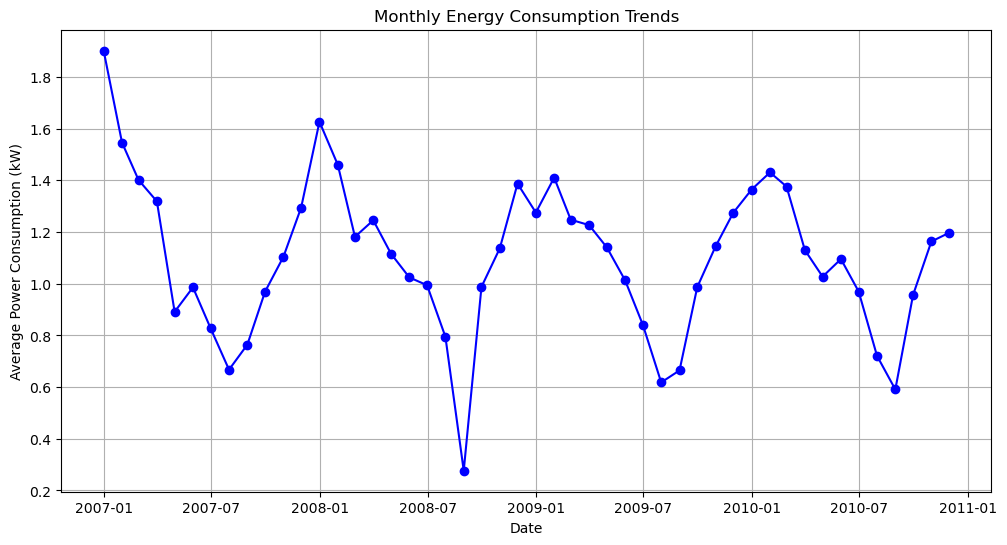

In [91]:
#Visualization of energy trends and predictive performance.

df["Datetime"] = pd.to_datetime(df["Datetime"])  # Ensuring Datetime format
df.set_index("Datetime", inplace=True) #Setting DateTime column as index will help to plot easily

# Aggregate by month
df_monthly = df.resample("M").mean()

# Plot Monthly Trends
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly["Global_active_power"], marker="o", linestyle="-", color="blue")
plt.xlabel("Date")
plt.ylabel("Average Power Consumption (kW)")
plt.title("Monthly Energy Consumption Trends")
plt.grid()
plt.show()
